In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('../data/raw/skill_builder_dataset.csv', encoding='ISO-8859-1', low_memory=False)
print("Initial shape:", df.shape)

Initial shape: (346860, 31)


In [120]:
# Select Relevant Features for Regression
selected_features = ['skill_id', 'problem_id', 'type', 'answer_type', 
                     'correct', 'attempt_count', 'ms_first_response', 
                     'hint_count', 'overlap_time', 'opportunity']

In [121]:
# Handle Missing Values
print("\nMissing values before handling:\n", df[selected_features].isnull().sum())

# Fill numeric columns with 0
for col in ['correct', 'attempt_count', 'ms_first_response', 'hint_count', 'overlap_time', 'opportunity']:
    df[col] = df[col].fillna(0)

# Fill categorical columns with 'Unknown'
for col in ['skill_id', 'problem_id', 'type', 'answer_type']:
    df[col] = df[col].fillna('Unknown')



Missing values before handling:
 skill_id             63755
problem_id               0
type                     0
answer_type              0
correct                  0
attempt_count            0
ms_first_response        0
hint_count               0
overlap_time             0
opportunity              0
dtype: int64


In [122]:

# Encode Categorical Columns using Label Encoding
le = LabelEncoder()
for col in ['skill_id', 'problem_id', 'type', 'answer_type']:
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])

In [123]:
# Create Synthetic Score Column
df['score'] = (
    df['correct'] * 100                            # Give full marks for correct
    - df['attempt_count'] * 1                      # Reduce penalty for attempts
    - df['hint_count'] * 1                         # Reduce penalty for hints
    - (df['ms_first_response'] / 30000)            # Small penalty for slow response
    - (df['overlap_time'] / 30000)                 # Small penalty for overlap
    - df['opportunity'] * 0.3  )
# Clip scores to stay between 0 and 100
df['score'] = df['score'].clip(0, 100)

In [124]:
# Prepare X and y
X = df[selected_features]
y = df['score']

In [125]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# Scale Numeric Features
scaler = StandardScaler()
numeric_cols = ['correct', 'attempt_count', 'ms_first_response', 'hint_count', 'overlap_time', 'opportunity']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [127]:
# Save Processed Data
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

print("\n✅ Preprocessing complete. Processed files saved in /data/processed/")



✅ Preprocessing complete. Processed files saved in /data/processed/


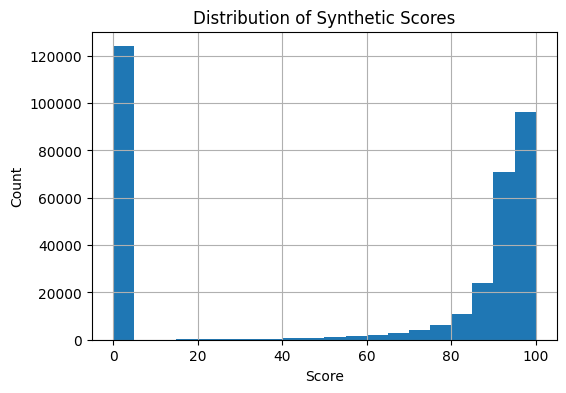

In [128]:
plt.figure(figsize=(6, 4))
df['score'].hist(bins=20)
plt.title("Distribution of Synthetic Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()